# 2.4 QR factorization


Let $A$ be a square matrix. This matrix can be decomposed as $A=QR$
where $Q$ is an orthogonal matrix ($Q^{*}Q=QQ^{*}=I$) and $R$ is an upper triangular matrix. Moreover,  if A is invertible and if $R$ is required to be positive, then the factorization is unique.

Furthermore, there are several methods for computing the QR decomposition such as  Gram–Schmidt process, Householder transformations, ... Here, we use Gram–Schmidt process.

Consider matrix $A = \begin{bmatrix}| & | &  & | \\ \vec{a}_1 & \vec{a}_2 & \dots & \vec{a}_n\\
| & | &  & | \end{bmatrix}$ were $ \vec{a}_i$ are the columns of the full column rank matrix $A$. Now, define the [projection](https://hatefdastour.github.io/notes/Linear_Algebra/Projections.html) as follows:

$$\operatorname {proj} _{\vec{u} }\vec{a} ={\frac {\left\langle \vec{u} ,\vec{a} \right\rangle }{\left\langle \vec{u} ,\vec{u}\right\rangle }}{\vec{u}}$$
Therefore,

\begin{align*}
\begin{cases}
\vec{u}_{1}&=\vec{a}_{1}, &\vec{e}_{1}&={\vec{u}_{1} \over \|\vec{u}_{1}\|}\\
\vec{u}_{2}&=\vec{a}_{2}-\operatorname {proj} _{\vec{u}_{1}}\,\vec{a}_{2},&\vec{e}_{2}&={\vec{u}_{2} \over \|\vec{u}_{2}\|}\\
\vec{u}_{3}&=\vec{a}_{3}-\operatorname {proj} _{\vec{u}_{1}}\,\vec{a}_{3}-\operatorname {proj} _{\vec{u}_{2}}\,\vec{a}_{3},&\vec{e}_{3}&={\vec{u}_{3} \over \|\vec{u}_{3}\|}\\&\vdots &&\vdots \\
\vec{u}_{k}&=\vec{a}_{k}-\sum _{j=1}^{k-1}\operatorname {proj} _{\vec{u}_{j}}\,\vec{a}_{k},&\vec{e}_{k}&={\vec{u}_{k} \over \|\vec{u}_{k}\|}
\end{cases}
\end{align*}
Now, $\vec{a}_{i}$ can be expressed as

\begin{align*}
\begin{cases}
\vec{a}_{1}&=\langle \vec{e}_{1},\vec{a}_{1}\rangle \vec{e}_{1}\\
\vec{a}_{2}&=\langle \vec{e}_{1},\vec{a}_{2}\rangle \vec{e}_{1}+\langle \vec{e}_{2},\vec{a}_{2}\rangle \vec{e}_{2}\\
\vec{a}_{3}&=\langle \vec{e}_{1},\vec{a}_{3}\rangle \vec{e}_{1}+\langle \vec{e}_{2},\vec{a}_{3}\rangle \vec{e}_{2}+\langle \vec{e}_{3},\vec{a}_{3}\rangle \vec{e}_{3}\\&\vdots \\
\vec{a}_{k}&=\sum _{j=1}^{k}\langle \vec{e}_{j},\vec{a}_{k}\rangle \vec{e}_{j}
\end{cases}
\end{align*}

where $\left\langle \vec{e}_{i},\vec{a}_{i}\right\rangle =\left\|\vec{u}_{i}\right\|$.

This can be written in matrix form:

\begin{align*}
A&=QR
\\
\begin{bmatrix}a_{11} & a_{12} & \dots & a_{1n} \\ a_{21} & a_{22} & \dots & a_{2n} \\
a_{31} & a_{32} & \dots & a_{3n} \\
\vdots & \vdots &   & \vdots \\ a_{n1} & a_{n2} & \dots & a_{nn} \end{bmatrix} &=
\begin{bmatrix}| & | &  & | \\ \vec{e}_1 & \vec{e}_2 & \dots & \vec{e}_n\\
| & | &  & | \end{bmatrix}
\begin{bmatrix}
\langle \vec{e}_{1},\vec{a}_{1}\rangle &\langle \vec{e}_{1},\vec{a}_{2}\rangle &\langle \vec{e}_{1},\vec{a}_{3}\rangle &\ldots 
& \langle \vec{e}_{1},\vec{a}_{n}\rangle \\
0&\langle \vec{e}_{2},\vec{a}_{2}\rangle &\langle \vec{e}_{2},\vec{a}_{3}\rangle &\ldots & \langle \vec{e}_{2},\vec{a}_{n}\rangle\\
0&0&\langle \vec{e}_{3},\vec{a}_{3}\rangle &\ldots & \langle \vec{e}_{3},\vec{a}_{n}\rangle\\
\vdots &\vdots &\vdots &\ddots &\vdots\\
0 & 0 & \dots & \dots & \langle \vec{e}_{n},\vec{a}_{n} \rangle \end{bmatrix}.
\end{align*}

See [1] for the full derivation of this algorithm. Furthermore, we can prepare a Python code using the above algorithm.

In [1]:
import numpy as np
import pandas as pd

def myQR(A):
    """
    Input: A
    Applies the Gram-Schmidt method to A.
    Output: Q, R
    """
    Q = np.zeros(A.shape, dtype = float)
    R = np.zeros(A.shape, dtype = float)
    A = A.astype(float)
    for j in range(A.shape[0]):
        T = A[:, j]
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], A[:, j])
            T -= R[i, j] * Q[:, i]
        R[j, j] = np.sqrt(np.dot(T, T))
        Q[:, j] = T /R[j, j]
        del T
    return Q, R

<font color='Blue'><b>Example</b></font>: Apply $LU$ decomposition on the following matrix.
$$A = \left[\begin{array}{cccc} 7 & 3 & -1 & 2\\ 3 & 8 & 1 & -4\\ -1 & 1 & 4 & -1\\ 2 & -4 & -1 & 6 \end{array}\right]$$

We have,

<IPython.core.display.Latex object>

array([[ 0.8819171 , -0.12001372,  0.10823812, -0.44283568],
       [ 0.37796447,  0.75437193, -0.06201752,  0.53312257],
       [-0.12598816,  0.18859298,  0.97180277, -0.06449063],
       [ 0.25197632, -0.6172134 ,  0.20009425,  0.71799572]])

<IPython.core.display.Latex object>

array([[ 7.93725393,  4.53557368, -1.25988158,  1.88982237],
       [ 0.        ,  8.3323809 ,  2.24597098, -7.14938855],
       [ 0.        ,  0.        ,  3.51686121,  0.69330902],
       [ 0.        ,  0.        ,  0.        ,  1.35430329]])

<IPython.core.display.Latex object>

array([[ 7.,  3., -1.,  2.],
       [ 3.,  8.,  1., -4.],
       [-1.,  1.,  4., -1.],
       [ 2., -4., -1.,  6.]])

<IPython.core.display.Latex object>

array([[ 1., -0., -0.,  0.],
       [-0.,  1.,  0., -0.],
       [-0.,  0.,  1.,  0.],
       [ 0., -0.,  0.,  1.]])

<IPython.core.display.Latex object>

array([[ 1.,  0.,  0., -0.],
       [ 0.,  1., -0.,  0.],
       [ 0., -0.,  1.,  0.],
       [-0.,  0.,  0.,  1.]])

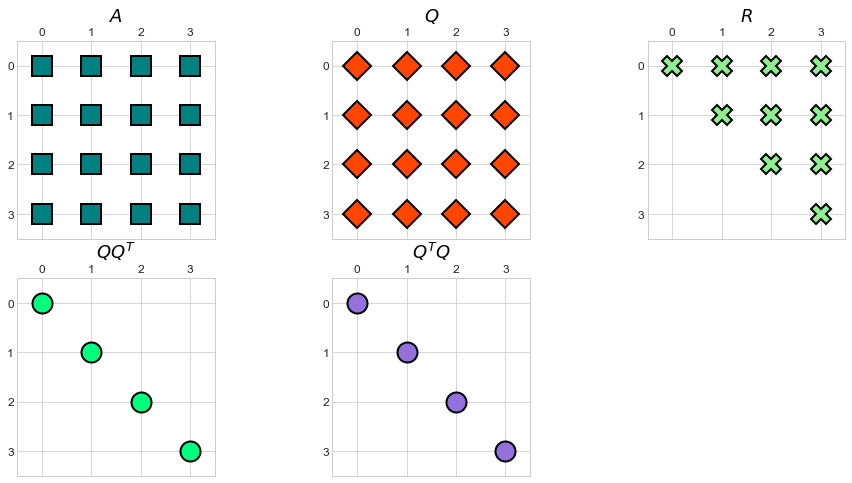

In [2]:
from IPython.display import display, Latex
A = np.array([ [7, 3, -1, 2], [3, 8, 1, -4], [-1, 1, 4, -1], [2, -4, -1, 6] ])
Q, R = myQR(A)
display(Latex(r'Q ='))
display(Q)
display(Latex(r'R ='))
display(R)
display(Latex(r'QR ='))
display(Q@R)
display(Latex(r'QQ^T ='))
display(np.round(Q@(Q.T), 2))
display(Latex(r'Q^TQ ='))
display(np.round((Q.T)@Q, 2))

import scipy.sparse as sps

## matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon
from matplotlib.font_manager import FontProperties

# plt setting
plt.style.use('seaborn-whitegrid')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
%matplotlib inline

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
ax = ax.ravel()
_ = fig.delaxes(ax[-1])
font = FontProperties()
font.set_weight('bold')
_ = ax[0].spy(sps.csr_matrix(A), aspect='equal', markersize= 20, color = 'Teal', markeredgecolor = 'Black',
              markeredgewidth = 2)
_ = ax[0].set_title(r'$A$', fontproperties=font, fontsize = 18)
_ = ax[1].spy(sps.csr_matrix(Q), aspect='equal', markersize= 20, color = 'OrangeRed', markeredgecolor = 'Black',
              marker ='D', markeredgewidth = 2)
_ = ax[1].set_title(r'$Q$', fontproperties=font, fontsize = 18)
_ = ax[2].spy(sps.csr_matrix(R), aspect='equal', markersize= 20, color = 'LightGreen', markeredgecolor = 'Black',
              marker ='X', markeredgewidth = 2)
_ = ax[2].set_title(r'$R$', fontproperties=font, fontsize = 18)

_ = ax[3].spy(sps.csr_matrix(np.round(Q@(Q.T), 2)), aspect='equal', markersize= 20, color = 'SpringGreen',
              markeredgecolor = 'Black', marker = "o", markeredgewidth = 2)
_ = ax[3].set_title(r'$QQ^T$', fontproperties=font, fontsize = 18)
_ = ax[4].spy(sps.csr_matrix(np.round((Q.T)@Q, 2)), aspect='equal', markersize= 20, color = 'MediumPurple',
              markeredgecolor = 'Black', marker = "o", markeredgewidth = 2)
_ = ax[4].set_title(r'$Q^TQ$', fontproperties=font, fontsize = 18)

Note that we could get a similar results using function, [```np.linalg.qr```](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html).

In [3]:
import scipy.linalg as linalg

Q, R = np.linalg.qr(A)
display(Latex(r'Q ='))
print(Q)
display(Latex(r'R ='))
print(R)
display(Latex(r'QR ='))
display(Q@R)
display(Latex(r'QQ^T ='))
display(np.round(Q@(Q.T), 2))
display(Latex(r'Q^TQ ='))
display(np.round((Q.T)@Q, 2))

<IPython.core.display.Latex object>

[[-0.8819171   0.12001372 -0.10823812 -0.44283568]
 [-0.37796447 -0.75437193  0.06201752  0.53312257]
 [ 0.12598816 -0.18859298 -0.97180277 -0.06449063]
 [-0.25197632  0.6172134  -0.20009425  0.71799572]]


<IPython.core.display.Latex object>

[[-7.93725393 -4.53557368  1.25988158 -1.88982237]
 [ 0.         -8.3323809  -2.24597098  7.14938855]
 [ 0.          0.         -3.51686121 -0.69330902]
 [ 0.          0.          0.          1.35430329]]


<IPython.core.display.Latex object>

array([[ 7.,  3., -1.,  2.],
       [ 3.,  8.,  1., -4.],
       [-1.,  1.,  4., -1.],
       [ 2., -4., -1.,  6.]])

<IPython.core.display.Latex object>

array([[ 1.,  0., -0.,  0.],
       [ 0.,  1.,  0., -0.],
       [-0.,  0.,  1., -0.],
       [ 0., -0., -0.,  1.]])

<IPython.core.display.Latex object>

array([[ 1.,  0., -0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [-0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

## 2.4.1 Solving Linear systems using QR factorization

We can solve the linear system $Ax=b$ for $x$ using QR factorization. To demonstrate this, we use the following example,

Let
$$A=\left[\begin{array}{cccc} 7 & 3 & -1 & 2\\ 3 & 8 & 1 & -4\\ -1 & 1 & 4 & -1\\ 2 & -4 & -1 & 6 \end{array}\right]
\quad \text{and}\quad
b=\left[\begin{array}{c} 7\\ 1\\ 11\\ 15 \end{array}\right].$$
Then, this linear system can be also expressed as
$$Ax=(QR)x=Q(Rx)=b,$$ 	
we have,

In [4]:
A = np.array([ [7, 3, -1, 2], [3, 8, 1, -4], [-1, 1, 4, -1], [2, -4, -1, 6] ])
b = np.array([[7],[1],[11],[15]])
Q, R = np.linalg.qr(A)
display(Latex(r'Q ='))
print(Q)
display(Latex(r'R ='))
print(R)

<IPython.core.display.Latex object>

[[-0.8819171   0.12001372 -0.10823812 -0.44283568]
 [-0.37796447 -0.75437193  0.06201752  0.53312257]
 [ 0.12598816 -0.18859298 -0.97180277 -0.06449063]
 [-0.25197632  0.6172134  -0.20009425  0.71799572]]


<IPython.core.display.Latex object>

[[-7.93725393 -4.53557368  1.25988158 -1.88982237]
 [ 0.         -8.3323809  -2.24597098  7.14938855]
 [ 0.          0.         -3.51686121 -0.69330902]
 [ 0.          0.          0.          1.35430329]]


Now we can solve the following linear systems instead
$$\begin{cases}
Qy = b,\\
Rx=y.
\end{cases}$$

In [5]:
# solving Lz=b for z
y = np.linalg.solve(Q, b)
display(Latex(r'y ='))
print(y)

<IPython.core.display.Latex object>

[[ -8.94515919]
 [  7.26940226]
 [-14.38689355]
 [  7.49381157]]


In [6]:
# solving Ux=y for x
x = np.linalg.solve(R, y)
display(Latex(r'x ='))
print(x)

<IPython.core.display.Latex object>

[[-1.46666667]
 [ 3.06666667]
 [ 3.        ]
 [ 5.53333333]]


Let's now solve the linear system directly and compare the results.

In [7]:
x1 = np.linalg.solve(A, b)
display(Latex(r'x ='))
print(x1)

<IPython.core.display.Latex object>

[[-1.46666667]
 [ 3.06666667]
 [ 3.        ]
 [ 5.53333333]]


***
# References
1. Allaire, Grégoire, et al. Numerical linear algebra. Vol. 55. New York: Springer, 2008.
1. Burden, Richard L., and J. Douglas Faires. "Numerical analysis 8th ed." Thomson Brooks/Cole (2005).
1. Atkinson, Kendall E. An introduction to numerical analysis. John wiley & sons, 2008.
1. Khoury, Richard, and Douglas Wilhelm Harder. Numerical methods and modelling for engineering. Springer, 2016.
***